# Divide and Conquer

In [1]:
import time
import random
from random import randint
import sys

import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_array(n):
    return [randint(1, 3 * n) for e in range(n)]

** 我们已经见过的Divide and Conquer相关的问题：**

- Binary Search
- Merge Sort
- Quick Sort

The divide-and-conquer strategy solves a problem by:
1. Breaking it into subproblems that are themselves smaller instances of the same type of problem
2. Recursively solving these subproblems
3. Appropriately combining their answers

The real work is done piecemeal, in three different places: in the partitioning of problems into subproblems; at the very tail end of the recursion, when the subproblems are so small that they are solved outright; and in the gluing together of partial answers. These are held together and coordinated by the algorithm’s core recursive structure.

In this lecture, you will learn:

<a href='#Ex1'>Ex.1 Find Medium / Find kth Element</a>

<a href='#Ex2'>Ex.2 Fast Power</a>

<a href='#Ex3'>Ex.3 Search Peak Element</a>

<a href='#Ex4'>Ex.4 Find index of an extra element present in one sorted array</a>

<a href='#Ex5'>Ex.5 Maximum Sum Subarray </a>

<a href='#Ex6'>Ex.6 Count Inversions</a>

### <a id='Ex1'>Ex.1: Find Medium / Find kth Element</a>

See Document.

In [2]:
# O(nlgn) time
def findKthLargest1(nums, k):
    start = time.time()
    rst = sorted(nums, reverse=True)
    t = time.time() - start
    return rst[k-1], len(rst), t

In [6]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest1(numbers, len(numbers)//2)
m

[2, 9, 15, 13, 2, 7]


(9, 6, 4.0531158447265625e-06)

In [7]:
random_lists = [generate_random_array(1000 * n) for n in range(1, 21)]

In [8]:
rst = [findKthLargest1(l, len(l)//2) for l in random_lists]
rst

[(1492, 1000, 0.00031185150146484375),
 (3217, 2000, 0.0006411075592041016),
 (4541, 3000, 0.0010139942169189453),
 (5965, 4000, 0.0013191699981689453),
 (7649, 5000, 0.0013737678527832031),
 (9161, 6000, 0.0018796920776367188),
 (10560, 7000, 0.0019478797912597656),
 (12128, 8000, 0.003792285919189453),
 (13599, 9000, 0.003185749053955078),
 (14865, 10000, 0.0033788681030273438),
 (16316, 11000, 0.004227161407470703),
 (18038, 12000, 0.004804134368896484),
 (19709, 13000, 0.0063381195068359375),
 (21349, 14000, 0.009508848190307617),
 (22375, 15000, 0.011462926864624023),
 (24284, 16000, 0.010488033294677734),
 (25796, 17000, 0.012048721313476562),
 (26917, 18000, 0.009855985641479492),
 (28410, 19000, 0.011754035949707031),
 (30454, 20000, 0.008451223373413086)]

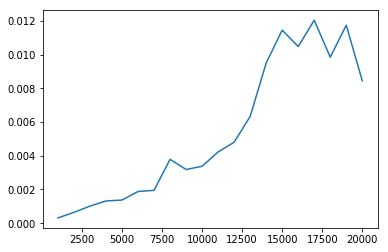

In [9]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [10]:
# O(nk) time, bubble sort idea, TLE
def findKthLargest2(nums, k):
    start = time.time()
    for i in range(k):
        for j in range(len(nums)-i-1):
            if nums[j] > nums[j+1]:
                # exchange elements, time consuming
                nums[j], nums[j+1] = nums[j+1], nums[j]
    t = time.time() - start
    return nums[len(nums)-k], len(nums), t

In [11]:
rst = [findKthLargest2(l, len(random_lists)//2) for l in random_lists]
rst

[(2977, 1000, 0.0032117366790771484),
 (5973, 2000, 0.010735034942626953),
 (8971, 3000, 0.014020919799804688),
 (11972, 4000, 0.024186134338378906),
 (14969, 5000, 0.0249021053314209),
 (17989, 6000, 0.023370981216430664),
 (20964, 7000, 0.024584054946899414),
 (23944, 8000, 0.03176593780517578),
 (26980, 9000, 0.028307199478149414),
 (29972, 10000, 0.032061100006103516),
 (32981, 11000, 0.03595113754272461),
 (35976, 12000, 0.04004025459289551),
 (38986, 13000, 0.04348111152648926),
 (41962, 14000, 0.05947399139404297),
 (44973, 15000, 0.05585479736328125),
 (47979, 16000, 0.05399203300476074),
 (50967, 17000, 0.06481003761291504),
 (53974, 18000, 0.076019287109375),
 (56973, 19000, 0.07460999488830566),
 (59959, 20000, 0.06774115562438965)]

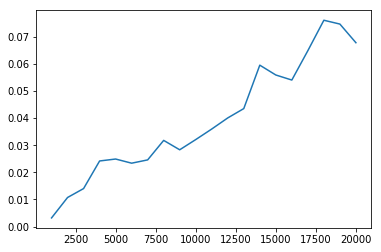

In [12]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [ ]:
# O(n) time, quick selection
def findKthLargest(nums, k):
    # convert the kth largest to smallest
    start = time.time()
    rst = findKthSmallest(nums, len(nums)+1-k)
    t = time.time() - start
    return rst, len(nums), t
    
def findKthSmallest(nums, k):
    if nums:
        pos = partition(nums, 0, len(nums)-1)
        if k > pos+1:
            return findKthSmallest(nums[pos+1:], k-pos-1)
        elif k < pos+1:
            return findKthSmallest(nums[:pos], k)
        else:
            return nums[pos]
 
# choose the right-most element as pivot   
def partition(nums, l, r):
    low = l
    while l < r:
        if nums[l] < nums[r]:
            nums[l], nums[low] = nums[low], nums[l]
            low += 1
        l += 1
    nums[low], nums[r] = nums[r], nums[low]
    return low

In [ ]:
numbers = generate_random_array(6)
print(numbers)
m = findKthLargest(numbers, len(numbers)//2)
m

In [ ]:
rst = [findKthLargest(l, len(random_lists)//2) for l in random_lists]
rst

In [ ]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [ ]:
l = generate_random_array(1000000)

In [ ]:
r = findKthLargest1(l, len(l)//2)
r

In [ ]:
r = findKthLargest(l, len(l)//2)
r

### <a id='Ex2'>Ex.2: Fast Power</a>

In [1]:
def fast_power_flaw(x, n):  # 没考虑 n<0的情况  
    if n <= 0:
        return 1
    elif n == 1:
        return x
    elif n % 2:     #奇数
        return fast_power_flaw(x * x, n // 2) * x
    else:
        return fast_power_flaw(x * x, n // 2) 

In [2]:
def fast_power(x, n):
    if n == 0:
        return 1.0
    elif n < 0:
        return 1 / fast_power(x, -n)
    elif n % 2:   # 奇数
        return fast_power(x * x, n // 2) * x
    else:
        return fast_power(x * x, n // 2)

In [3]:
fast_power_flaw(5,2)

25

In [4]:
fast_power_flaw(5, 0)

1

In [5]:
fast_power_flaw(5, -2)

1

In [6]:
fast_power_flaw(0,2)

0

In [7]:
fast_power_flaw(0, 0)

1

In [8]:
fast_power_flaw(0,-2)

1

### <a id='Ex3'>Ex.3: Search Peak Element</a>

The array has no duplicates, may contain multiple peaks, return the index to any one of the peaks.

You may imagine that num[-1] = num[n] = -∞. 

In [13]:
# O(lgn)
def search_peak(alist):
    return peak_helper(alist, 0, len(alist) - 1)

def peak_helper(alist, start, end):
    if start == end:
        return start
    
    if (start + 1 == end):
        if alist[start] > alist[end]:
            return start
        return end
    
    mid = (start + end) // 2
    if alist[mid] > alist[mid - 1] and alist[mid] > alist[mid + 1]:  # 找到了
        return mid
    if alist[mid - 1] > alist[mid] and alist[mid] > alist[mid + 1]:  # 前面比mid大, mid比后面大,下降趋势,往前面找
        return peak_helper(alist, start, mid - 1)
    return peak_helper(alist, mid + 1, end) # 上升趋势, 往后面找

### <a id='Ex4'>Ex.4: Find index of an extra element present in one sorted array</a>

Given two sorted arrays. 

There is only 1 difference between the arrays. First array has one element extra added in between. 

Find the *index* of the extra element.

Examples:

Input : {2, 4, 6, 8, 9, 10, 12};
        {2, 4, 6, 8, 10, 12};
        
Output : 4

The first array has an extra element 9.

The extra element is present at index 4.

Input :  {3, 5, 7, 9, 11, 13}
         {3, 5, 7, 11, 13}
         
Output :  3

In [16]:
## Returns index of extra element in arr1[].
def find_extra(arr1, arr2):
    for i in range(len(arr2)):
        if (arr1[i] != arr2[i]):
            return i
 
    return len(arr1)-1

In [38]:
ar1 = [2, 4, 6, 8, 9, 10, 12]
ar2 = [2, 4, 6, 8, 10, 12]
find_extra_fast(ar1, ar2)

4

In [39]:
ar1 = [3, 5, 7, 9, 11, 13]
ar2 = [3, 5, 7, 11, 13]
find_extra_fast(ar1, ar2)

3

In [40]:
ar1 = [3, 5, 7, 9, 11, 13, 16]
ar2 = [3, 5, 7, 9, 11, 13]
find_extra_fast(ar1, ar2)

6

In [43]:
ar1 = [1, 3, 5, 7, 9, 11, 13]
ar2 = [3, 5, 7, 9, 11, 13]
find_extra_fast(ar1, ar2)

0

In [44]:
ar1 = [1]
ar2 = []
find_extra_fast(ar1, ar2)

0

In [42]:
def find_extra_fast(arr1, arr2):
    index = len(arr2)
    # left and right are end points denoting
    # the current range.
    left, right = 0, len(arr2) - 1
    while (left <= right):
        mid = (left + right) // 2;
 
        # If middle element is same of both
        # arrays, it means that extra element
        # is after mid so we update left to mid+1
        if (arr2[mid] == arr1[mid]):
            left = mid + 1
 
        # If middle element is different of the
        # arrays, it means that the index we are
        # searching for is either mid, or before
        # mid. Hence we update right to mid-1.
        else:
            index = mid
            right = mid - 1;
 
    # when right is greater than left our
    # search is complete.
    return index

### <a id='Ex5'>Ex.5: Maximum Sum Subarray</a>

Find the sum of contiguous subarray within a one-dimensional array of numbers which has the largest sum.

<img src="../images/ch06/maxsubarraysum.png" width="320"/>


In [8]:
# O(n^2)
def subarray1(alist):
    result = -sys.maxsize
    for i in range(0, len(alist)):
        sum = 0
        for j in range (i, len(alist)):
            sum += alist[j]
            if sum > result:
                result = sum
    return result

In [9]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray1(alist)

7

In [1]:
# O(n lgn)
def subarray2(alist):
    return subarray2_helper(alist, 0, len(alist)-1)

def subarray2_helper(alist, left, right):
    if (left == right):
        return alist[left]
    mid = (left + right) // 2
    return max(subarray2_helper(alist, left, mid), 
               subarray2_helper(alist, mid+1, right), 
               maxcrossing(alist, left, mid, right))

def maxcrossing(alist, left, mid, right):
    sum = 0
    left_sum = -sys.maxsize
    for i in range (mid, left-1, -1):
        sum += alist[i]
        if (sum > left_sum):
            left_sum = sum
            
    sum = 0
    right_sum = -sys.maxsize
    for i in range (mid+1, right+1):
        sum += alist[i]
        if (sum > right_sum):
            right_sum = sum        

    return left_sum + right_sum


In [10]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray2(alist)

7

In [ ]:
# O(n)
def subarray3(alist):
    result = -sys.maxsize
    local = 0
    for i in alist:
        local = max(local + i, i)
        result = max(result, local)
    return result

In [11]:
alist = [-2,-3,4,-1,-2,1,5,-3]
subarray3(alist)

7

### <a id='Ex6'>Ex.6: Count Inversions</a>

** Define the number of inversion **
    i, j form an inversion if a[i] > a[j] for any i < j, that is, if the two elements a[i] and a[j] are "out of order".


In [12]:
# O(n^2)
def countInv(arr):
    n = len(arr)
    inv_count = 0
    for i in range(n):
        for j in range(i+1, n):
            if (arr[i] > arr[j]):
                inv_count += 1
 
    return inv_count
 
arr = [1, 20, 6, 4, 5]
n = len(arr)
print("Number of inversions are", countInv(arr))

Number of inversions are 5


In [14]:
def merge(left,right):
    result = list()
    i,j = 0,0
    inv_count = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        elif right[j] < left[i]:
            result.append(right[j])
            j += 1
            inv_count += (len(left)-i)
    result += left[i:]
    result += right[j:]
    return result,inv_count

# O(nlgn)
def countInvFast(array):
    if len(array) < 2:
        return array, 0
    middle = len(array) // 2
    left,inv_left = countInvFast(array[:middle])
    right,inv_right = countInvFast(array[middle:])
    merged, count = merge(left,right)
    count += (inv_left + inv_right)
    return merged, count

In [15]:
arr = [1, 20, 6, 4, 5]
n = len(arr)
print("Number of inversions are", countInvFast(arr))

Number of inversions are ([1, 4, 5, 6, 20], 5)
